# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Data_13TeV.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("mini");
tree->Print()

******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries :  9796409 : Total =      9169958260 bytes  File  Size = 1581230017 *
*        :          : Tree compression factor =   5.80                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  9796409 : Total  Size=   39192025 bytes  File Size  =     196049 *
*Baskets :       59 : Basket Size=    2097664 bytes  Compression= 199.15     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  9796409 : Total  Size=   39192155 bytes  File Size  =   33515436 *
*Baskets :       59 : Basket Size=    2097664 bytes  Compression=   1.16     *
*...................................................

Activate variables 

In [4]:

Bool_t e_trig;
Bool_t mu_trig;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;

vector<Float_t> *lep_pt;  
vector<Float_t> *lep_eta;  
vector<Float_t> *lep_phi;  
vector<Float_t> *lep_E;  
vector<Int_t> *lep_type;  
vector<Bool_t> *lep_isTight;  
vector<Float_t> *lep_ptcone30;
vector<Float_t> *lep_etcone20;

vector<Float_t> *jet_pt;  
vector<Float_t> *jet_eta;  
vector<Float_t> *jet_phi;  
vector<Float_t> *jet_E;  
vector<Float_t> *jet_jvt;  
vector<Float_t> *jet_MV2;  


tree->SetBranchAddress("trigE", &e_trig);
tree->SetBranchAddress("trigM", &mu_trig);
tree->SetBranchAddress("lep_n", &lep_n);
tree->SetBranchAddress("jet_n", &jet_n);
tree->SetBranchAddress("met_et", &MET);
tree->SetBranchAddress("met_phi", &MET_phi);

tree->SetBranchAddress("lep_pt", &lep_pt);
tree->SetBranchAddress("lep_eta", &lep_eta);
tree->SetBranchAddress("lep_phi", &lep_phi);
tree->SetBranchAddress("lep_E", &lep_E);
tree->SetBranchAddress("lep_type", &lep_type);
tree->SetBranchAddress("lep_isTightID", &lep_isTight);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20);

tree->SetBranchAddress("jet_pt", &jet_pt);
tree->SetBranchAddress("jet_eta", &jet_eta);
tree->SetBranchAddress("jet_phi", &jet_phi);
tree->SetBranchAddress("jet_E", &jet_E);
tree->SetBranchAddress("jet_jvt", &jet_jvt);
tree->SetBranchAddress("jet_MV2c10", &jet_MV2);



Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
TH1F *cutflow_el = new TH1F("Cutflow-e","Electrons; Cut; Events",10,0,10);
TH1F *cutflow_mu = new TH1F("Cutflow-mu","Muons; Cut; Events",10,0,10);

TH1F *hist_lepton_pt = new TH1F("Lepton pT","lepton pT; p_{T} (GeV); Events",20,5,105);
TH1F *hist_lepton_eta = new TH1F("Lepton #eta","lepton #eta; #eta; Events",50,-5,5);
TH1F *hist_lepton_trackiso = new TH1F("Lepton Track-Iso","lepton trk_iso; Track_Iso; Events",20,0,1);
TH1F *hist_lepton_caloiso = new TH1F("Lepton Calo-Iso","lepton calo_iso; Calo_Iso; Events",20,0,1);

TH1F *hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *hist_nbjets = new TH1F("Number of b-jets","n-bjets; b-Jet multiplicity; Events",10,0,10);

TH1F *hist_jet_pt = new TH1F("Jet pT","Jet pT; p_{T} (GeV); Events",40,5,205);
TH1F *hist_jet_eta = new TH1F("Jet #eta","Jet #eta; #eta; Events",50,-5,5);
TH1F *hist_jet_jvt = new TH1F("Jet JVT","Jet JVT; JVT; Events",20,-1,1);
TH1F *hist_jet_MV2 = new TH1F("Jet MV2","Jet MV2; MV2; Events",20,0,1);

TH1F *hist_MET = new TH1F("MET","MET; E_{T}^{miss} (GeV); Events",40,5,205);
TH1F *hist_mTW = new TH1F("mTW","mTW; m_{T}^{W} (GeV); Events",40,5,205);


Loop and fill histograms

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

int cut1 = 0;
int cut2 = 0;

int cut3el = 0;
int cut4el = 0;
int cut5el = 0;
int cut6el = 0;
int cut7el = 0;
int cut8el = 0;

int cut3mu = 0;
int cut4mu = 0;
int cut5mu = 0;
int cut6mu = 0;
int cut7mu = 0;
int cut8mu = 0;



for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   

    cut1++;
    cutflow_el->Fill(1);
    cutflow_mu->Fill(1);
 
    
    //Trigger
    if(!e_trig && !mu_trig) continue;
    cut2++;
    cutflow_el->Fill(2);
    cutflow_mu->Fill(2);
 
        
    // Preselection of good leptons                                                                                
    int n_el=0;
    int n_mu=0;
    int lep_index=-1;

    for(unsigned int i=0; i<lep_n; i++){
     // Lepton is isolated and hard pT    
        hist_lepton_pt->Fill(lep_pt->at(i)/1000.);
        hist_lepton_trackiso->Fill(lep_ptcone30->at(i)/lep_pt->at(i));
        hist_lepton_caloiso->Fill(lep_etcone20->at(i)/lep_pt->at(i));
        hist_lepton_eta->Fill(lep_eta->at(i));
  
        if( !lep_isTight->at(i)) continue;
        if( lep_pt->at(i) < 30000.) continue; 
        if( lep_ptcone30->at(i)/lep_pt->at(i) > 0.15 ) continue; 
        if( lep_etcone20->at(i)/lep_pt->at(i) > 0.15 ) continue;  
        if( lep_type->at(i)==11 && TMath::Abs(lep_eta->at(i)) < 2.47 
                && ( TMath::Abs(lep_eta->at(i)) < 1.37 || TMath::Abs(lep_eta->at(i)) > 1.52 ) ){
                n_el++;}
        if( lep_type->at(i)==13 && TMath::Abs(lep_eta->at(i)) < 2.5 ){
                n_mu++;}
        if(n_el==1 && n_mu==0 && e_trig) lep_index=i;
        if(n_mu==1 && n_el==0 && mu_trig) lep_index=i;
    }
    
    if(lep_index==-1) continue;
    if(lep_type->at(lep_index)==11 ) {cutflow_el->Fill(3); cut3el++;}
    if(lep_type->at(lep_index)==13 ) {cutflow_mu->Fill(3); cut3mu++;}

    
    
    int n_jets=0;
    int n_bjets=0;
    
    hist_njets->Fill(jet_n);
    
    if(jet_n<4) continue; 
    if(lep_type->at(lep_index)==11) {cutflow_el->Fill(4); cut4el++;}
    if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(4); cut4mu++;}

    std::vector<int> good_jet_index;
    
    for(unsigned int j=0; j<jet_n; j++){
        hist_jet_pt->Fill(jet_pt->at(j)/1000.);
        hist_jet_eta->Fill(jet_eta->at(j));
        hist_jet_jvt->Fill(jet_jvt->at(j));
        hist_jet_MV2->Fill(jet_MV2->at(j));
        
        if(jet_pt->at(j) < 30000.) continue;
        if(TMath::Abs(jet_eta->at(j)) > 2.5) continue;
        // JVF cleaning                                                                                    
        if (jet_pt->at(j) < 60000. && TMath::Abs(jet_eta->at(j)) < 2.4 && jet_jvt->at(j) >0.59){
            n_jets++;
            good_jet_index.push_back(j);
        }
        // cut on MV2   
        if (jet_MV2->at(j) >= 0.8244273){n_bjets++;}    
    }
    
    if(n_jets<4) continue; 
    if(lep_type->at(lep_index)==11) {cutflow_el->Fill(5); cut5el++;}
    if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(5); cut5mu++;}
    
    hist_nbjets->Fill(n_bjets);
  
    if(n_bjets==0) continue;
    if(lep_type->at(lep_index)==11) {cutflow_el->Fill(6); cut6el++;}
    if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(6); cut6mu++;}
    
    hist_MET->Fill(MET/1000.);
    
    if(MET<30000.) continue;
    if(lep_type->at(lep_index)==11) {cutflow_el->Fill(7); cut7el++;}
    if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(7); cut7mu++;}
  
    
    // TLorentzVector definitions                                                               
    TLorentzVector Lepton  = TLorentzVector();
    TLorentzVector  MeT  = TLorentzVector();
    TLorentzVector  Lepton_MeT = TLorentzVector();

    Lepton.SetPtEtaPhiE(lep_pt->at(lep_index), lep_eta->at(lep_index), lep_phi->at(lep_index),lep_E->at(lep_index));
    MeT.SetPtEtaPhiE(MET, 0, MET_phi , MET);

    //Calculation of the Invariant Mass using TLorentz vectors (First Lepton + MeT)             
    Lepton_MeT = Lepton + MeT;
    float InvMass = Lepton_MeT.Mag();
    float InvMass_inGeV = InvMass/1000.;
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));

    hist_mTW->Fill(mTW/1000.);

    if(mTW<30000.) continue;
    if(lep_type->at(lep_index)==11) {cutflow_el->Fill(8); cut8el++;}
    if(lep_type->at(lep_index)==13) {cutflow_mu->Fill(8); cut8mu++;}
  
    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3-el:" << cut3el << std::endl;
std::cout << "Cut4-el:" << cut4el << std::endl;
std::cout << "Cut5-el:" << cut5el << std::endl;
std::cout << "Cut6-el:" << cut6el << std::endl;
std::cout << "Cut7-el:" << cut7el << std::endl;
std::cout << "Cut8-el:" << cut8el << std::endl;

std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl;
std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3-mu:" << cut3mu << std::endl;
std::cout << "Cut4-mu:" << cut4mu << std::endl;
std::cout << "Cut5-mu:" << cut5mu << std::endl;
std::cout << "Cut6-mu:" << cut6mu << std::endl;
std::cout << "Cut7-mu:" << cut7mu << std::endl;
std::cout << "Cut8-mu:" << cut8mu << std::endl;



Done!
All events:9796409
Cut1:9796409
Cut2:9796409
Cut3-el:3395699
Cut4-el:87363
Cut5-el:3481
Cut6-el:1831
Cut7-el:1411
Cut8-el:1222
All events:9796409
Cut1:9796409
Cut2:9796409
Cut3-mu:3156594
Cut4-mu:66470
Cut5-mu:2759
Cut6-mu:1594
Cut7-mu:1244
Cut8-mu:1063


<p>Draw</p>

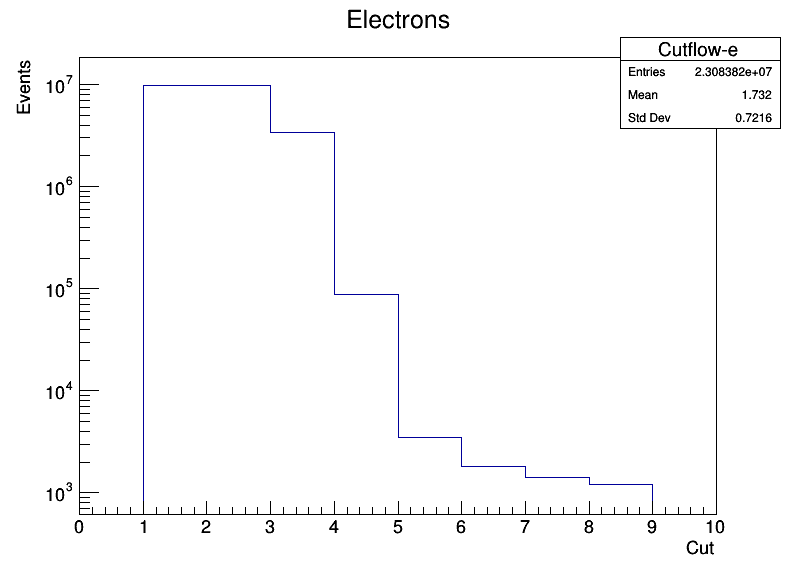

In [8]:
cutflow_el->Draw("");
canvas->SetLogy();
canvas->Draw();

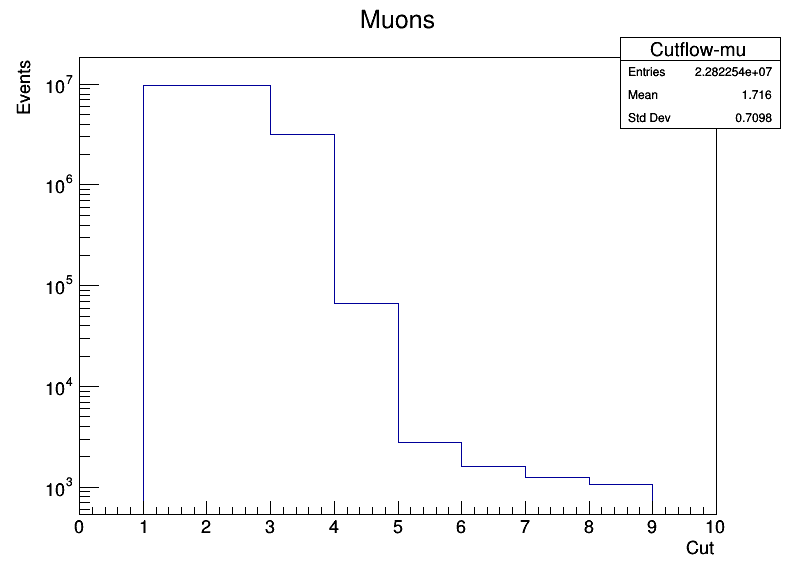

In [9]:
cutflow_mu->Draw("");
canvas->Draw();

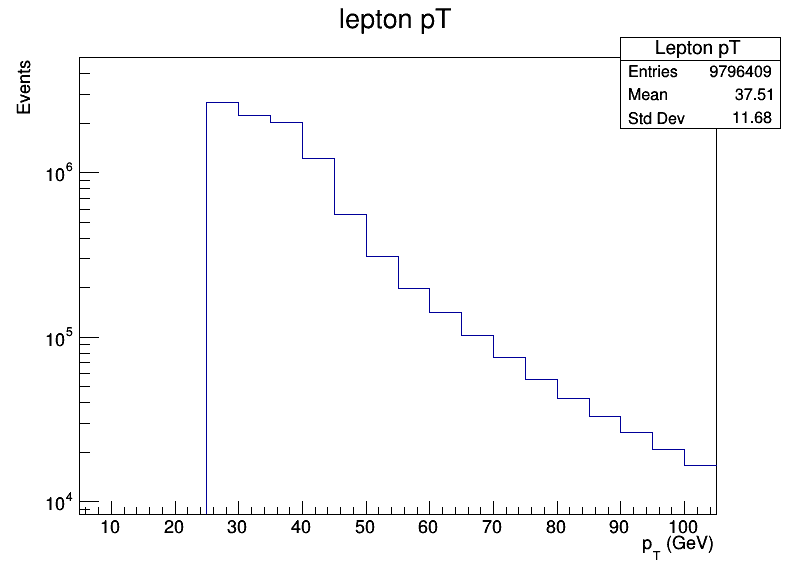

In [10]:
hist_lepton_pt->Draw();
canvas->Draw();

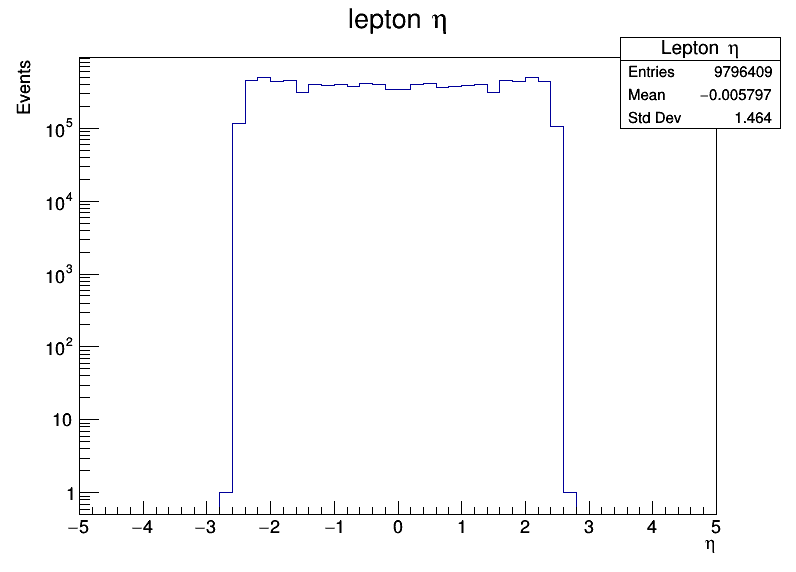

In [11]:
hist_lepton_eta->Draw();
canvas->Draw();

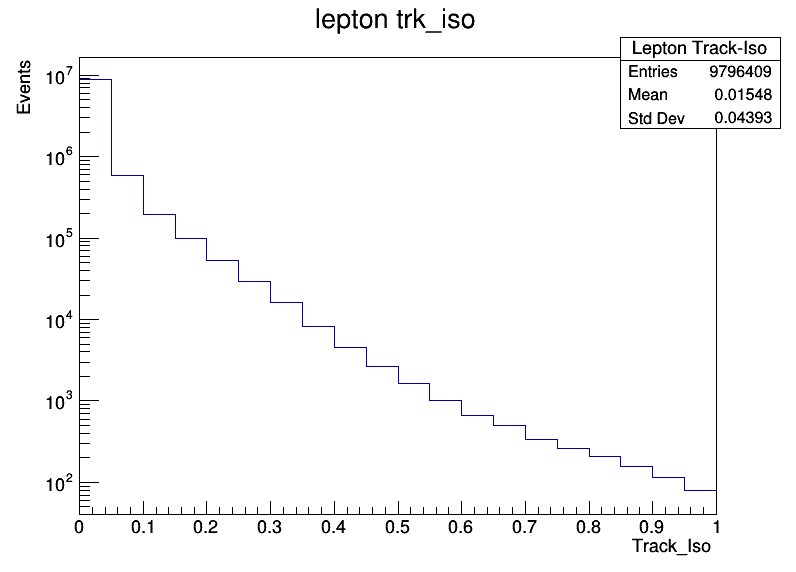

In [12]:
hist_lepton_trackiso->Draw();
canvas->Draw();

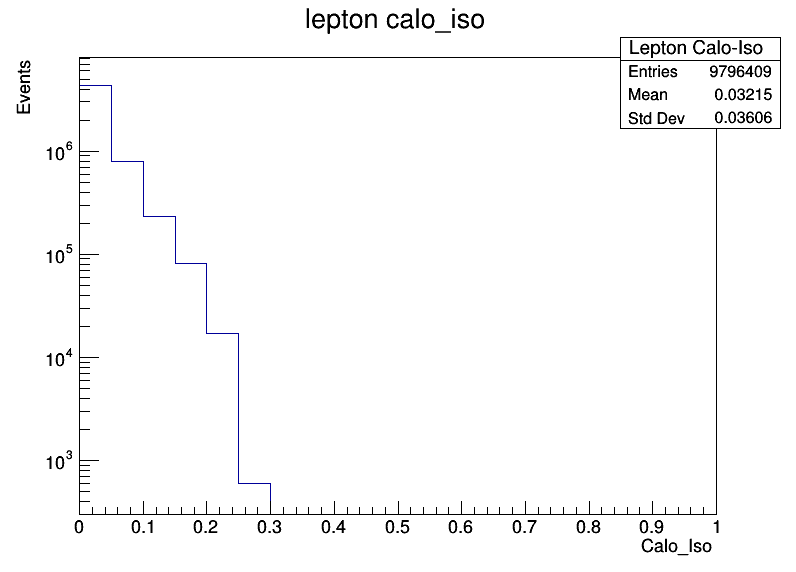

In [13]:
hist_lepton_caloiso->Draw();
canvas->Draw();

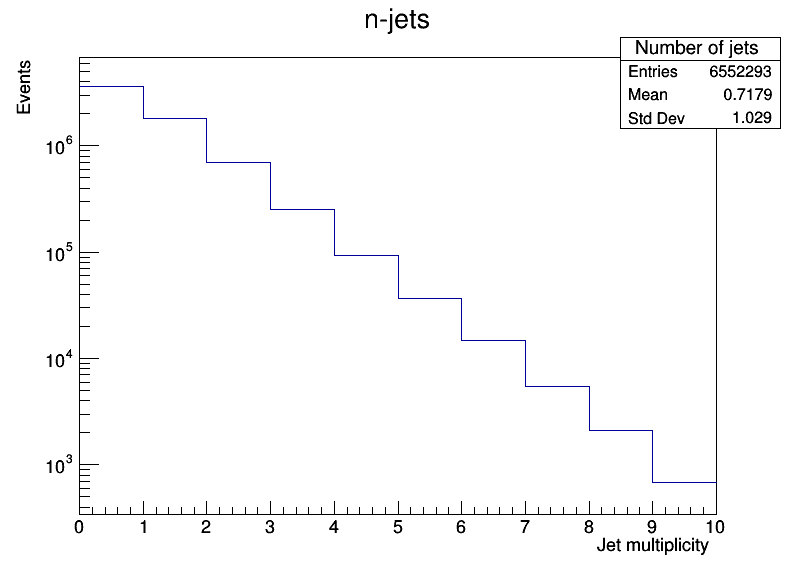

In [14]:
hist_njets->Draw();
canvas->Draw();

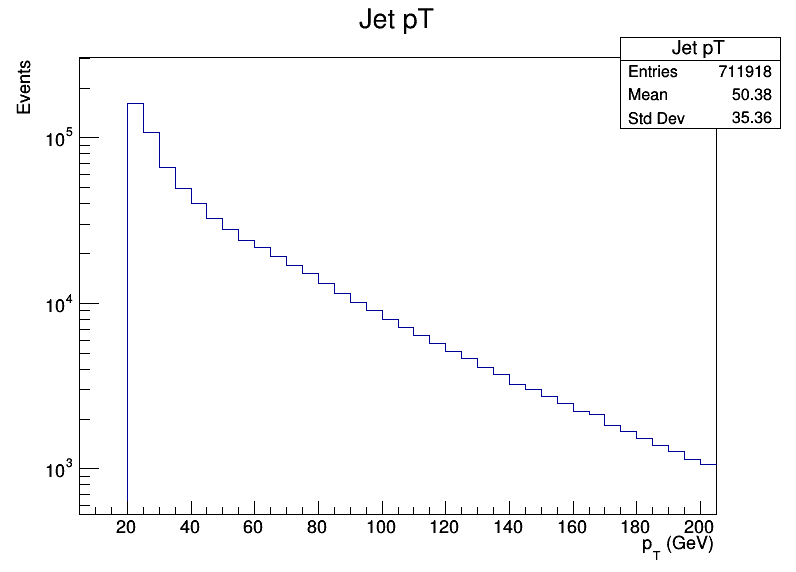

In [15]:
hist_jet_pt->Draw();
canvas->Draw();

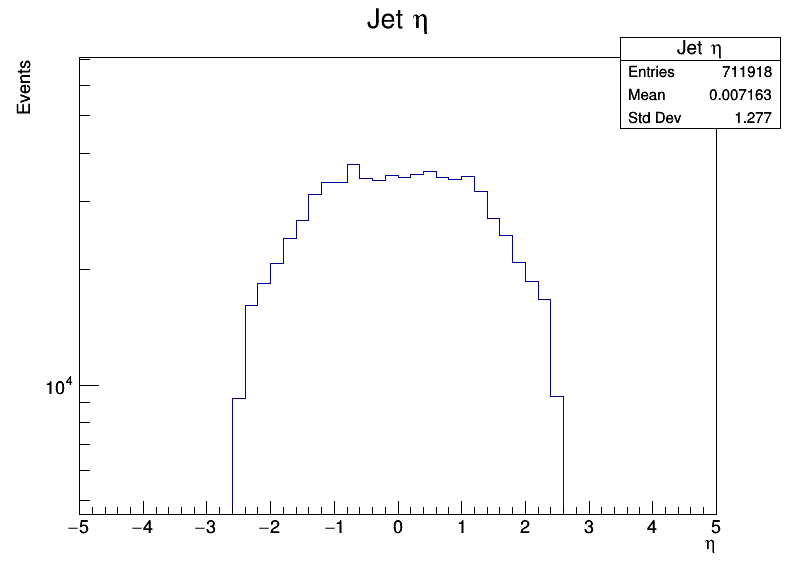

In [16]:
hist_jet_eta->Draw();
canvas->Draw();

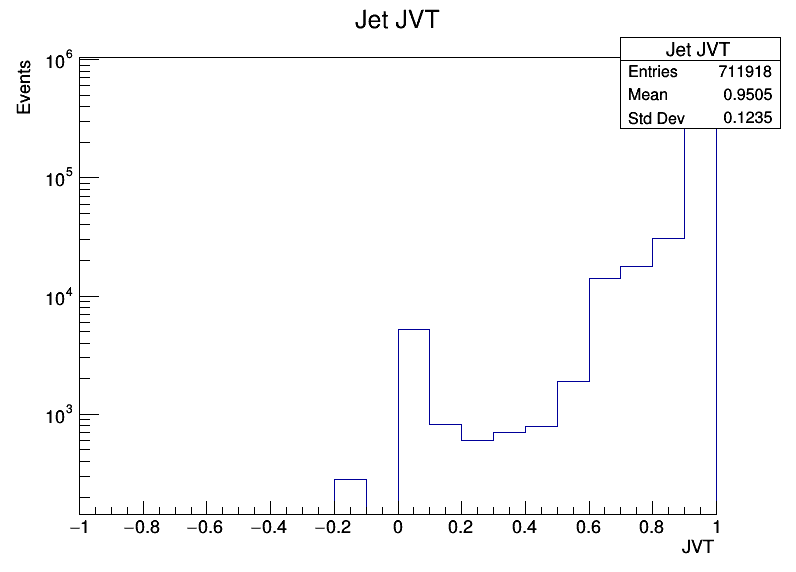

In [17]:
hist_jet_jvt->Draw();
canvas->Draw();

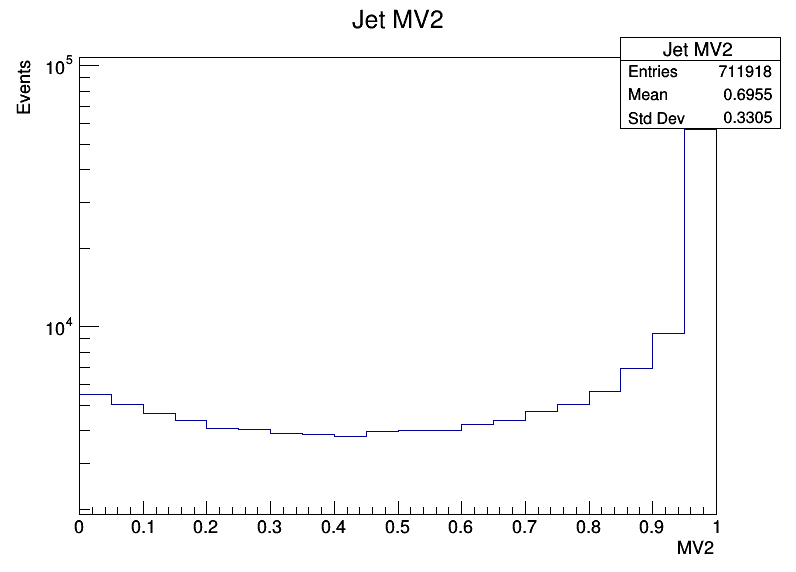

In [18]:
hist_jet_MV2->Draw();
canvas->Draw();

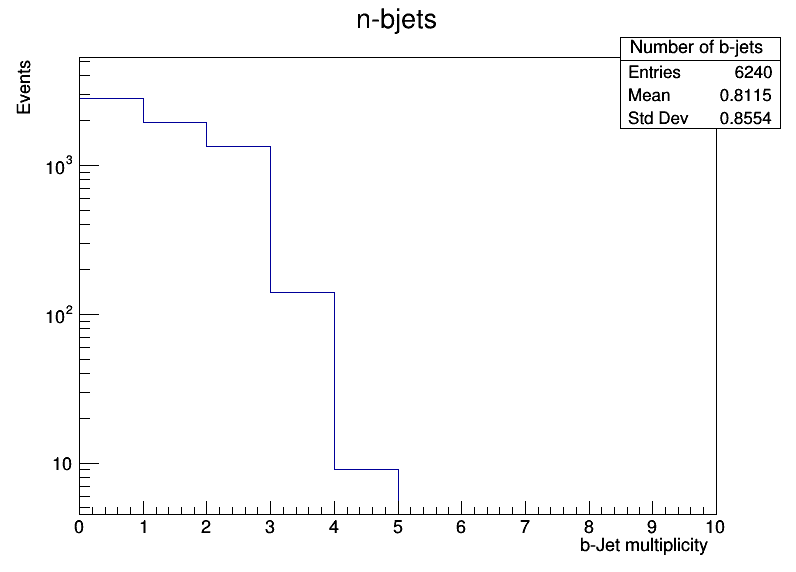

In [19]:
hist_nbjets->Draw();
canvas->Draw();

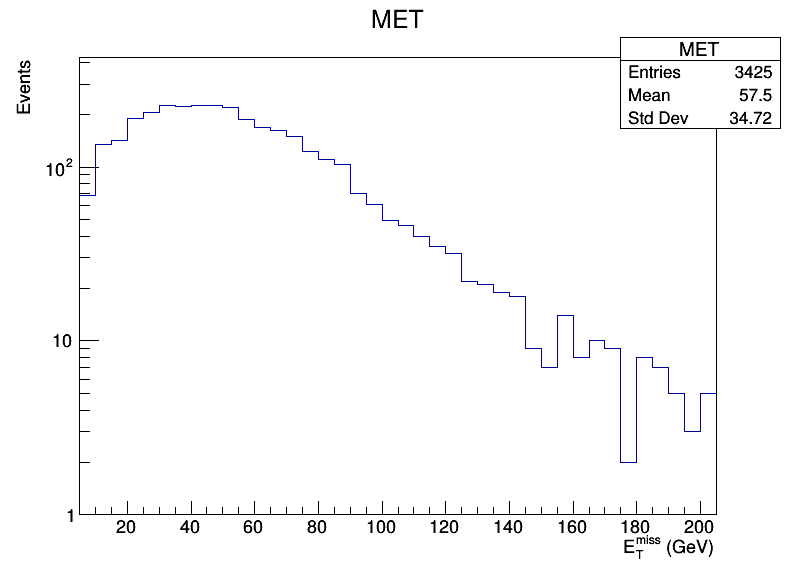

In [20]:
hist_MET->Draw();
canvas->Draw();

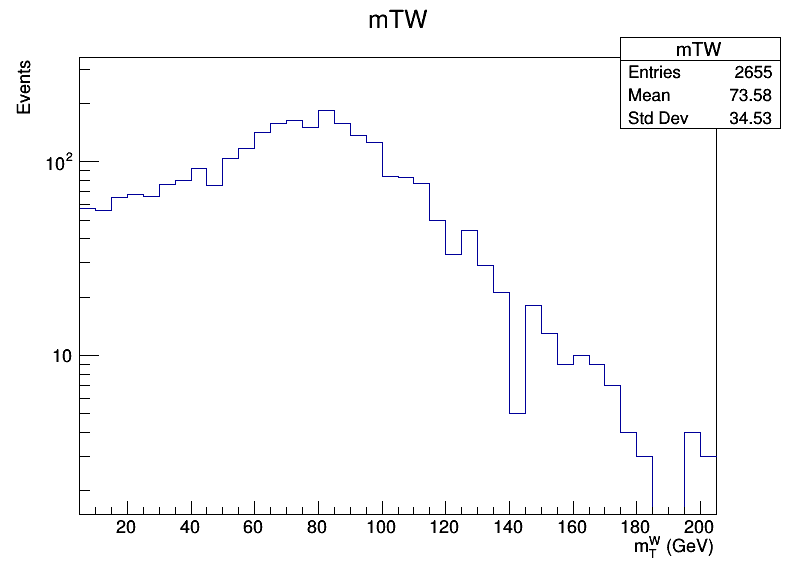

In [21]:
hist_mTW->Draw();
canvas->Draw();